<a href="https://colab.research.google.com/github/adityajivoji/VDP/blob/main/mnist_classifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install python-mnist

In [35]:
#importing libraries

import numpy as np
from mnist import MNIST
from matplotlib import pyplot as plt

In [36]:
def load_MNIST_data():
    mnist = MNIST('.')
    x_train, y_train = mnist.load_training() #60000 samples
    x_test, y_test = mnist.load_testing()    #10000 samples
    # converting the data to numpy.ndarray format
    x_train = np.asarray(x_train).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.int32)
    x_test = np.asarray(x_test).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.int32)
    y_train = y_train.reshape(y_train.shape[0], 1)
    y_test = y_test.reshape(y_test.shape[0], 1)
    x_train = x_train.T
    y_train = y_train.T
    x_test = x_test.T
    y_test = y_test.T
    x_train = x_train/255
    x_test = x_test/255
    return x_train, y_train , x_test, y_test

In [37]:
x_train, y_train, x_test, y_test = load_MNIST_data()

In [38]:
def separate(y_train,y_test):
    y_new_train = np.zeros((10,60000))
    for i in range (0,60000):
        y_new_train[y_train[0, i],i] += 1

    y_new_test = np.zeros((10,10000))

    for i in range (0,10000):
        y_new_test[y_test[0, i],i] += 1
    return y_new_train, y_new_test

In [39]:
y_train, y_test = separate(y_train, y_test)

In [40]:
def sigmoid(X):#sigmoid funtion return sigmoid and Z as a cache 
    return 1/(1+np.exp(-X)) , X

def dsigmoid(Z):
    ds=(np.exp(-Z))/(np.exp(-Z)+1)**2
    return ds

def relu(X):#relu funtion return Relu and Z as cache 
    return np.maximum(X,0.0), X

def drelu(X):#derivative of relu funtion
    S=(1*(X>0))
    return S

def sigmoid_backward(dA,Z):
    return np.multiply(dA,dsigmoid(Z))

def relu_backward(dA,Z):
    return np.multiply(dA,drelu(Z))
    
def softmax(Z):#softmax function
    S=(Z-Z.max())
    X=np.exp(S)
    sum=np.sum(X,0)
    return (np.divide(X,sum)) ,Z

def softmax_backprop(AL,Y):
    return AL - Y

In [41]:
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_test = x_test.shape[0]

In [42]:
def initialize_parameters_deep(layer_dims):
    
    parameters = {}
    L = len(layer_dims) # number of layers in the network
    np.random.seed(0)
    for l in range(1, L):
        #(≈ 2 lines of code)
        # parameters['W' + str(l)] = ...
        # parameters['b' + str(l)] = ...
        # YOUR CODE STARTS HERE
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.001
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1)) * 0.0001 + 0.00000001
        
        # YOUR CODE ENDS HERE
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [43]:
def linear_forward(A_prev, W, b):
       
    #(≈ 1 line of code)
    # Z = ...
    # YOUR CODE STARTS HERE
    Z = (np.dot(W,A_prev) + b)
    
    # YOUR CODE ENDS HERE
    cache = (A_prev, W, b)
    
    return Z, cache

In [44]:
def linear_activation_forward(A_prev, W, b, activation):
   
    if activation == "sigmoid":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
        # YOUR CODE ENDS HERE
    
    elif activation == "relu":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    elif activation == "softmax":
        #(≈ 2 lines of code)
        # Z, linear_cache = ...
        # A, activation_cache = ...
        # YOUR CODE STARTS HERE
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
        
        # YOUR CODE ENDS HERE
    cache = (linear_cache, activation_cache)

    return A, cache

In [45]:
def L_model_forward(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A 
        #(≈ 2 lines of code)
        # A, cache = ...
        # caches ...
        # YOUR CODE STARTS HERE
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)] , parameters["b" + str(l)] , "relu")
        caches.append(cache)
        # YOUR CODE ENDS HERE
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    #(≈ 2 lines of code)
    # AL, cache = ...
    # caches ...
    # YOUR CODE STARTS HERE
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)] , parameters["b" + str(L)] , "softmax")
    caches.append(cache)
    
    # YOUR CODE ENDS HERE
          
    return AL, caches

In [46]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]
    # doubt
    # Compute loss from aL and y.
    # (≈ 1 lines of code)
    # cost = ...
    # YOUR CODE STARTS HERE
    
    # cost = (- 1 /m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) old one
    buffer=1e-10
    lossFxn=-1*np.multiply(Y,np.log(AL + buffer))
    cost=(np.sum(lossFxn)/m)
    # YOUR CODE ENDS HERE
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return cost

In [47]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, _ = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    # dW = ...
    # db = ... sum by the rows of dZ with keepdims=True
    # dA_prev = ...
    # YOUR CODE STARTS HERE
    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * (np.sum(dZ, axis = 1, keepdims = True))
    dA_prev = np.dot(W.T, dZ)
    
    # YOUR CODE ENDS HERE
    
    return dA_prev, dW, db

In [48]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
        # YOUR CODE ENDS HERE
        
    elif activation == "sigmoid":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
        # YOUR CODE ENDS HERE
    elif activation == "softmax":
        #(≈ 2 lines of code)
        # dZ =  ...
        # dA_prev, dW, db =  ...
        # YOUR CODE STARTS HERE
        dZ = softmax_backprop(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
        # YOUR CODE ENDS HERE
    return dA_prev, dW, db

In [49]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    #(1 line of code)
    # dAL = ...
    # YOUR CODE STARTS HERE
    # dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) old one
    dZ=AL-Y
    
    # YOUR CODE ENDS HERE
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    #(approx. 5 lines)
    # current_cache = ...
    # dA_prev_temp, dW_temp, db_temp = ...
    # grads["dA" + str(L-1)] = ...
    # grads["dW" + str(L)] = ...
    # grads["db" + str(L)] = ...
    # YOUR CODE STARTS HERE
    current_cache = caches[L - 1]
    dA_prev_temp, dW_temp,db_temp = linear_activation_backward(dZ, current_cache, "sigmoid")
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    # YOUR CODE ENDS HERE
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        #(approx. 5 lines)
        # current_cache = ...
        # dA_prev_temp, dW_temp, db_temp = ...
        # grads["dA" + str(l)] = ...
        # grads["dW" + str(l + 1)] = ...
        # grads["db" + str(l + 1)] = ...
        # YOUR CODE STARTS HERE
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
        # YOUR CODE ENDS HERE

    return grads

In [64]:
def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    #(≈ 2 lines of code)
    for l in range(L):
        # parameters["W" + str(l+1)] = ...
        # parameters["b" + str(l+1)] = ...
        # YOUR CODE STARTS HERE
        if(l == 1): 

            print("before")
            print("W" + str(l+1) + ":" + str(parameters["W" + str(l+1)]))
            print("b" + str(l+1) + ":" + str(parameters["b" + str(l+1)]))
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        if (l == 1):
            print("after")
            print("W" + str(l+1) + ":" + str(parameters["W" + str(l+1)]))
            print("b" + str(l+1) + ":" + str(parameters["b" + str(l+1)]))
        # YOUR CODE ENDS HERE
    return parameters

In [65]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = []                         # keep track of cost
    
    # Parameters initialization.
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters_deep(layers_dims)
    
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        #(≈ 1 line of code)
        # AL, caches = ...
        # YOUR CODE STARTS HERE
        AL, cache = L_model_forward(X, parameters)
        
        # YOUR CODE ENDS HERE
        
        # Compute cost.
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        cost = compute_cost(AL, Y)
        
        # YOUR CODE ENDS HERE
    
        # Backward propagation.
        #(≈ 1 line of code)
        # grads = ...    
        # YOUR CODE STARTS HERE
        grads = L_model_backward(AL, Y, cache)
        
        # YOUR CODE ENDS HERE
 
        # Update parameters.
        #(≈ 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        paramters = update_parameters(parameters, grads, learning_rate)
        
        # YOUR CODE ENDS HERE
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, costs

In [66]:
def accuracy(Y_predict,Y_label):
    m=Y_label.shape[1]
    true=0
    Y_p=np.zeros((10,m))

    for i in  range(m):
        max_index=np.argmax(Y_predict[:,i:i+1],axis=0)
        Y_p[max_index,i]=1.0
        if (np.array_equal(Y_p[:,i:i+1],Y_label[:,i:i+1])):
            true+=1

    print("accuracy: ",(true/m)*100)

In [67]:
def print_shape(df):
    for f in df:
        print(f.shape)

Streaming output truncated to the last 5000 lines.
   1.67687792e-04 -1.40953758e-03 -5.57224193e-04 -1.07089599e-03
   1.07966356e-03 -7.71568144e-05  1.74413806e-04 -4.16978422e-04
  -2.07767264e-03  6.08224310e-04  8.86405060e-04  2.21834673e-04]
 [ 3.84240531e-05 -3.50008508e-04  5.17091334e-05  5.40606384e-05
  -1.45276325e-03  1.57006207e-03  4.52032997e-04  1.40290733e-03
   1.71356805e-03 -6.30113025e-05  2.37712404e-03 -7.61733934e-04
   6.95820047e-04 -4.67058184e-04 -2.01873659e-04  4.77789279e-04
   1.62203833e-03  1.00754558e-04  5.33799957e-04 -2.54892009e-04
   1.37594519e-03 -8.42570681e-04 -1.87424953e-03  6.63005125e-04
  -7.77281233e-04 -7.92318135e-04  1.27882945e-03 -1.71957894e-04
  -1.41363549e-03 -5.86998840e-04 -2.25871846e-03  3.53068415e-04
   1.47521030e-03  3.65467681e-04  8.55313979e-04 -8.50478192e-04
   1.27512518e-03  3.31033230e-04 -5.95720950e-04  7.14359853e-04
  -2.76933444e-04 -1.17300475e-04 -7.07037935e-04 -1.27335731e-03
   3.36182557e-03  1.361

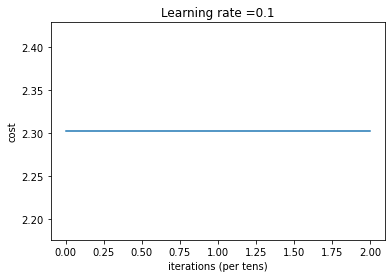

In [62]:
layers_dims = [784,100,10]
x, y = x_train[0:784,0:100], y_train[0:784, 0:100]
print_shape([x, y,x_train,y_train ])
Parameters, Cost = L_layer_model(x, y, layers_dims, learning_rate = 0.1, num_iterations = 300, print_cost=True)

In [63]:
yhat, end_cache = L_model_forward(x_test, Parameters)
accuracy(yhat, y_test) 

accuracy:  11.35
